C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

最优正则化参数 : 0.000335292414924956


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mathtext.py:854: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mathtext.py:855: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


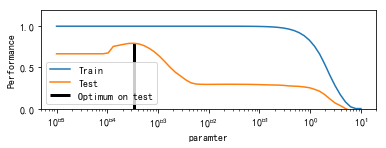

In [1]:
 import numpy as np  
 from sklearn import linear_model  
 
 ###############################################################################  
 # 生成样本数据
 n_samples_train, n_samples_test, n_features = 75, 150, 500  
 np.random.seed(0)  
 coef = np.random.randn(n_features)  
 coef[50:] = 0.0  # 只让前五十个变量影响模型 
 X = np.random.randn(n_samples_train + n_samples_test, n_features)  
 y = np.dot(X, coef)  
 
 # 分离训练集和测试集  
 X_train, X_test = X[:n_samples_train], X[n_samples_train:]  
 y_train, y_test = y[:n_samples_train], y[n_samples_train:]  
 
 ###############################################################################  
 # 计算训练误差和测试误差
 alphas = np.logspace(-5, 1, 60)  
 enet = linear_model.ElasticNet(l1_ratio=0.7)  
 train_errors = list()  
 test_errors = list()  
 for alpha in alphas:  
     enet.set_params(alpha=alpha)  
     enet.fit(X_train, y_train)  
     train_errors.append(enet.score(X_train, y_train))  
     test_errors.append(enet.score(X_test, y_test))  
 
 i_alpha_optim = np.argmax(test_errors)  
 alpha_optim = alphas[i_alpha_optim]  
 print("最优正则化参数 : %s" % alpha_optim)  
 
 # 在整个数据集上用正则化参数估计系数 
 enet.set_params(alpha=alpha_optim)  
 coef_ = enet.fit(X, y).coef_  
 
 ###############################################################################  
 # 画出结果图 
 
 import matplotlib.pyplot as plt  
 plt.rcParams['font.sans-serif'] = 'SimHei'
 plt.rcParams['axes.unicode_minus'] = False
 plt.subplot(2, 1, 1)  
 plt.semilogx(alphas, train_errors, label='Train')  
 plt.semilogx(alphas, test_errors, label='Test')  
 plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',  
         linewidth=3, label='Optimum on test')  
 plt.legend(loc='lower left')  
 plt.ylim([0, 1.2])  
 plt.xlabel('paramter')  
 plt.ylabel('Performance')  
 plt.show()
 


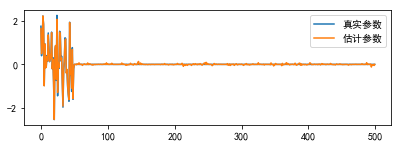

In [2]:
 # 真实参数与估计参数的对比
        
 plt.rcParams['font.sans-serif'] = 'SimHei'
 plt.rcParams['axes.unicode_minus'] = False
 plt.subplot(2, 1, 2)  
 plt.plot(coef, label='真实参数')  
 plt.plot(coef_, label='估计参数')  
 plt.legend()  
 plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.26)  
 plt.show()  